# 1. Tinjauan Proyek: Prediksi Dropout Mahasiswa

## 1.1. Latar Belakang Masalah
Tingkat *dropout* (putus kuliah) mahasiswa merupakan salah satu indikator penting bagi institusi pendidikan dalam mengevaluasi efektivitas sistem akademiknya. Angka *dropout* yang tinggi dapat merugikan berbagai pihak, mulai dari mahasiswa yang bersangkutan, keluarga, hingga reputasi institusi. Dengan mengidentifikasi faktor-faktor kunci yang memengaruhi keputusan mahasiswa untuk putus kuliah, institusi dapat merancang program intervensi yang lebih tepat sasaran.

Proyek ini bertujuan untuk membangun sebuah model *machine learning* yang mampu memprediksi kemungkinan seorang mahasiswa akan mengalami *dropout* berdasarkan data akademik dan demografis mereka.

## 1.2. Tujuan Analisis Data
Tujuan utama dari analisis ini adalah:
* Mengidentifikasi faktor-faktor paling signifikan yang berkontribusi terhadap *dropout* mahasiswa.
* Membangun model klasifikasi dengan akurasi yang baik untuk memprediksi mahasiswa yang berisiko *dropout*.
* Menyediakan dasar pengambilan keputusan bagi institusi untuk melakukan tindakan preventif.

## 1.3. Task Analisis
Bentuk analisis atau *task* yang digunakan dalam proyek ini adalah **Klasifikasi**. Model akan mengklasifikasikan mahasiswa ke dalam dua kategori: "**Dropout**" atau "**Lulus**".

## 1.4. Deskripsi Data
* **Sumber Data:** [UCI Machine Learning Repository: Student Performance Dataset](https://archive.ics.uci.edu/dataset/320/student+performance)
* **Deskripsi Singkat:** Dataset ini berisi data performa akademik (nilai mata pelajaran Matematika dan Bahasa Portugis), demografi, sosial, dan data terkait sekolah dari sekitar 649 siswa di dua sekolah menengah di Portugal. Karena data perguruan tinggi sulit didapatkan secara terbuka, dataset ini digunakan sebagai proksi yang relevan untuk menganalisis faktor-faktor akademik dan sosial.
* **Jumlah Data:** Dataset ini terdiri dari dua bagian (Matematika dan Bahasa Portugis) yang akan kita gabungkan. Total data setelah digabungkan adalah 1044 baris (mahasiswa) dengan 33 atribut.

# 2. Pengenalan Data (Data Understanding)

Pada tahap ini, kita akan memuat data dan melakukan eksplorasi awal untuk memahami karakteristik, distribusi, dan hubungan antar variabel dalam dataset. Visualisasi akan digunakan secara ekstensif untuk mempermudah pemahaman.

In [97]:
# Import library yang dibutuhkan
!pip install ucimlrepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style visualisasi
sns.set(style="whitegrid")

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
# Memuat data dari URL atau UCI
try:
    from ucimlrepo import fetch_ucirepo
    student_performance = fetch_ucirepo(id=320)
    # Gabungkan fitur dan target agar konsisten dengan fallback
    data = pd.concat([student_performance.data.features, student_performance.data.targets], axis=1)
except ImportError:
    url_mat = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv'
    data = pd.read_csv("https://raw.githubusercontent.com/devdio/datasets/main/student-mat.csv", sep=';')

# Menampilkan 5 baris pertama dari data
print("Lima Baris Pertama Data:")
display(data.head())

# Menampilkan informasi umum tentang dataset
print("\nInformasi Umum Dataset:")
data.info()

Lima Baris Pertama Data:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13



Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null 

### 2.1. Statistik Deskriptif dan Visualisasi
Kita akan melihat ringkasan statistik dari fitur numerik dan distribusi dari beberapa fitur kunci.

Statistik Deskriptif:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


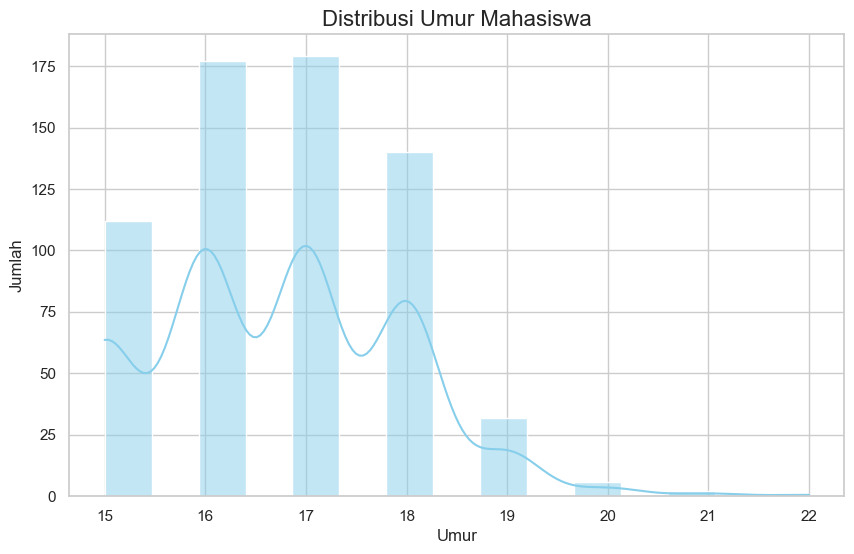

In [99]:
# Statistik deskriptif untuk kolom numerik
print("Statistik Deskriptif:")
display(data.describe())

# Visualisasi distribusi umur mahasiswa
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=15, kde=True, color='skyblue')
plt.title('Distribusi Umur Mahasiswa', fontsize=16)
plt.xlabel('Umur', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

D:\Temp\ipykernel_19536\591087695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=data, palette='viridis')


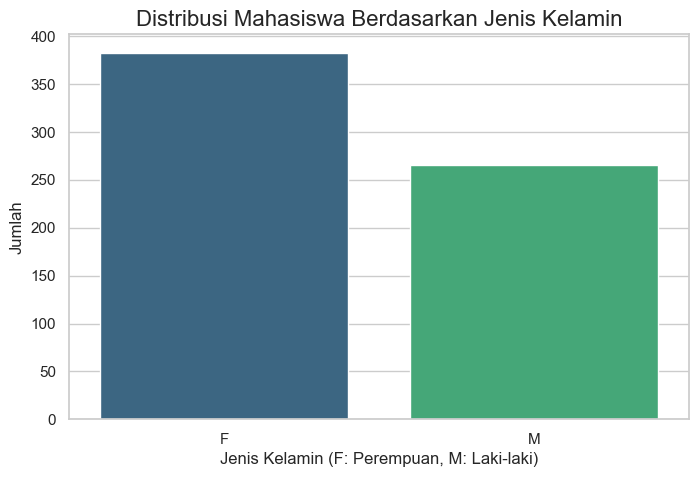

In [100]:
# Visualisasi distribusi jenis kelamin
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=data, palette='viridis')
plt.title('Distribusi Mahasiswa Berdasarkan Jenis Kelamin', fontsize=16)
plt.xlabel('Jenis Kelamin (F: Perempuan, M: Laki-laki)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

D:\Temp\ipykernel_19536\1330346919.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=data, palette='coolwarm')


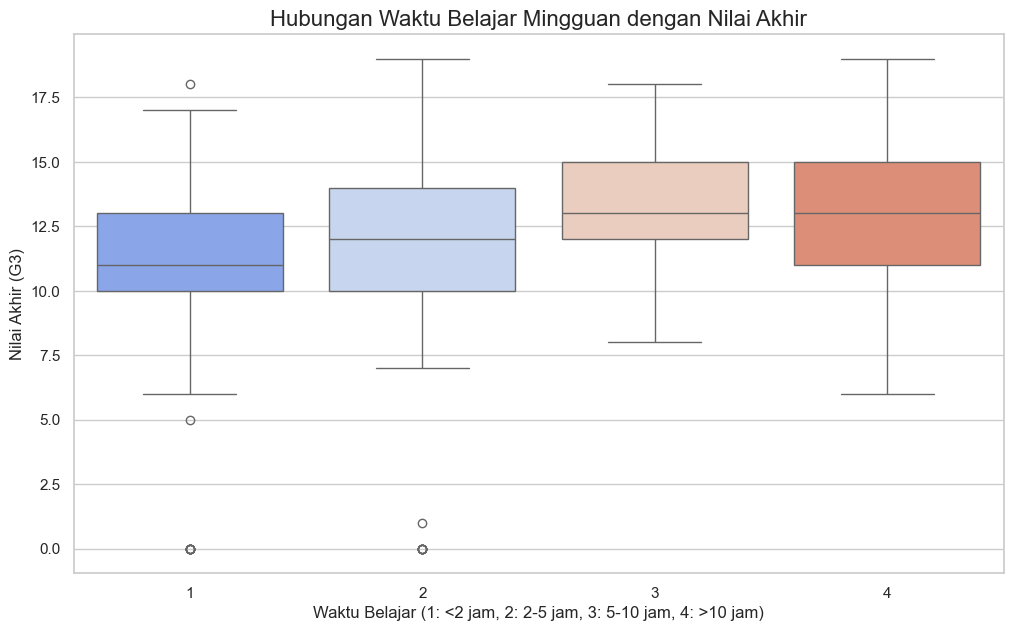

In [101]:
# Visualisasi hubungan antara waktu belajar dan nilai akhir (G3)
plt.figure(figsize=(12, 7))
sns.boxplot(x='studytime', y='G3', data=data, palette='coolwarm')
plt.title('Hubungan Waktu Belajar Mingguan dengan Nilai Akhir', fontsize=16)
plt.xlabel('Waktu Belajar (1: <2 jam, 2: 2-5 jam, 3: 5-10 jam, 4: >10 jam)', fontsize=12)
plt.ylabel('Nilai Akhir (G3)', fontsize=12)
plt.show()

# 3. Persiapan Data (Data Preparation)

Tahap ini mencakup pembersihan data, pembuatan fitur baru (feature engineering), transformasi data, dan penyeimbangan data jika diperlukan. Tujuannya adalah menyiapkan data agar siap digunakan untuk pemodelan.

In [102]:
# 3.1. Membuat Variabel Target (Dropout)
# Kita akan mendefinisikan 'dropout' sebagai mahasiswa dengan nilai akhir (G3) di bawah standar kelulusan.
# Di Portugal, nilai kelulusan biasanya 10 dari 20. Kita akan gunakan ambang batas ini.
# Nilai 0 atau 1: 0 = Lulus (G3 >= 10), 1 = Dropout (G3 < 10)
data['dropout'] = (data['G3'] < 10).astype(int)

# 3.2. Mengecek Missing Values
print("Jumlah Missing Values per Kolom:")
print(data.isnull().sum())
# Hasilnya menunjukkan tidak ada missing values, jadi tidak perlu imputasi.

Jumlah Missing Values per Kolom:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dropout       0
dtype: int64


In [103]:
# 3.3. Transformasi Data Kategorikal menjadi Numerik
df_model = data.copy()

# Pastikan semua kolom biner (yes/no) diubah ke 1/0
binary_cols = [
    'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
    'higher', 'internet', 'romantic'
]
for col in binary_cols:
    if col in df_model.columns:
        df_model[col] = df_model[col].map({'yes': 1, 'no': 0})

# Pastikan semua kolom kategorikal di-one-hot encoding sesuai dokumentasi
categorical_cols = [
    'school',      # 'GP', 'MS'
    'sex',         # 'F', 'M'
    'address',     # 'U', 'R'
    'famsize',     # 'LE3', 'GT3'
    'Pstatus',     # 'T', 'A'
    'Mjob',        # 'teacher', 'health', 'services', 'at_home', 'other'
    'Fjob',        # 'teacher', 'health', 'services', 'at_home', 'other'
    'reason',      # 'home', 'reputation', 'course', 'other'
    'guardian'     # 'mother', 'father', 'other'
]
# Hanya encode kolom yang ada
categorical_cols = [col for col in categorical_cols if col in df_model.columns]
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

print("Data setelah transformasi:")
display(df_model.head())

Data setelah transformasi:


,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,18,4,4,2,2,0,1,0,0,0,...,False,False,False,False,True,False,False,False,True,False
1,17,1,1,1,2,0,0,1,0,0,...,False,False,True,False,False,False,False,False,False,False
2,15,1,1,1,2,0,1,0,0,0,...,False,False,True,False,False,False,True,False,True,False
3,15,4,2,1,3,0,0,1,0,1,...,False,False,False,True,False,True,False,False,True,False
4,16,3,3,1,2,0,0,1,0,0,...,False,False,True,False,False,True,False,False,False,False


Distribusi Kelas Target (Dropout vs Lulus):
dropout
0    549
1    100
Name: count, dtype: int64


D:\Temp\ipykernel_19536\3236370570.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='pastel')


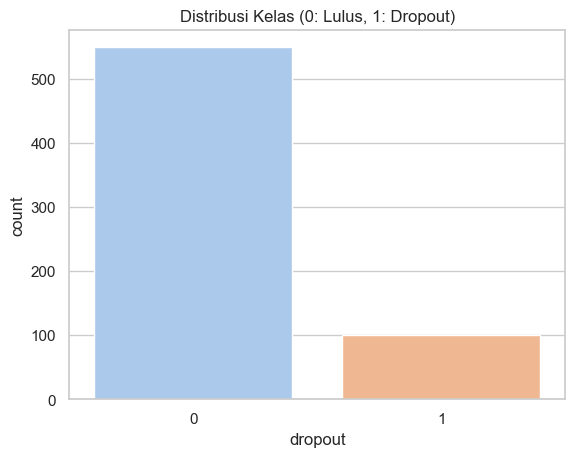

In [104]:
# 3.4. Seleksi Fitur
# Pastikan kolom G1, G2, G3 dibuang jika ada
for col in ['G1', 'G2', 'G3']:
    if col in df_model.columns:
        df_model = df_model.drop(col, axis=1)

# Memisahkan fitur (X) dan target (y)
X = df_model.drop('dropout', axis=1)
y = df_model['dropout']

print("Distribusi Kelas Target (Dropout vs Lulus):")
print(y.value_counts())

sns.countplot(x=y, palette='pastel')
plt.title('Distribusi Kelas (0: Lulus, 1: Dropout)')
plt.show()
# Data terlihat sedikit tidak seimbang, tapi tidak ekstrem. Kita akan lanjut tanpa penyeimbangan untuk saat ini.

# 4. Pemodelan Data

Pada tahap ini, kita akan memilih algoritma klasifikasi yang sesuai dan melatihnya menggunakan data yang telah disiapkan. Kita akan memulai dengan **Random Forest Classifier**, yang merupakan algoritma yang kuat, tahan terhadap overfitting, dan mampu memberikan informasi mengenai pentingnya setiap fitur.

Langkah-langkahnya adalah:
1.  Membagi data menjadi data latih (*training set*) dan data uji (*testing set*).
2.  Melatih model Random Forest pada data latih.

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Ukuran Data Latih: {X_train.shape}")
print(f"Ukuran Data Uji: {X_test.shape}")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

print("\nModel Random Forest berhasil dilatih!")

Ukuran Data Latih: (519, 39)
Ukuran Data Uji: (130, 39)

Model Random Forest berhasil dilatih!

Model Random Forest berhasil dilatih!


# 5. Evaluasi Model

Setelah model dilatih, kita perlu mengevaluasi performanya pada data uji untuk mengetahui seberapa baik model dapat menggeneralisasi pada data baru. Metrik evaluasi yang akan digunakan adalah:
* **Accuracy:** Persentase prediksi yang benar secara keseluruhan.
* **Classification Report:** Meliputi *Precision*, *Recall*, dan *F1-Score* untuk setiap kelas. Ini penting karena data kita sedikit tidak seimbang.
* **Confusion Matrix:** Tabel yang menunjukkan performa model secara detail (True Positive, False Positive, True Negative, False Negative).
* **Feature Importance:** Melihat fitur mana yang paling berpengaruh menurut model.

Akurasi Model: 0.8462

Laporan Klasifikasi:
              precision    recall  f1-score   support

   Lulus (0)       0.86      0.97      0.91       110
 Dropout (1)       0.50      0.15      0.23        20

    accuracy                           0.85       130
   macro avg       0.68      0.56      0.57       130
weighted avg       0.81      0.85      0.81       130



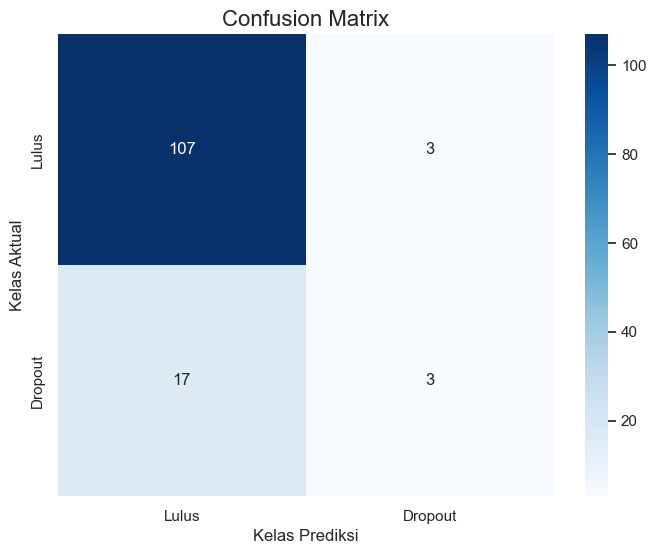

In [106]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Lulus (0)', 'Dropout (1)']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lulus', 'Dropout'], yticklabels=['Lulus', 'Dropout'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Kelas Aktual', fontsize=12)
plt.xlabel('Kelas Prediksi', fontsize=12)
plt.show()

D:\Temp\ipykernel_19536\2692292278.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pentingnya', y='Fitur', data=feature_importance_df, palette='plasma')


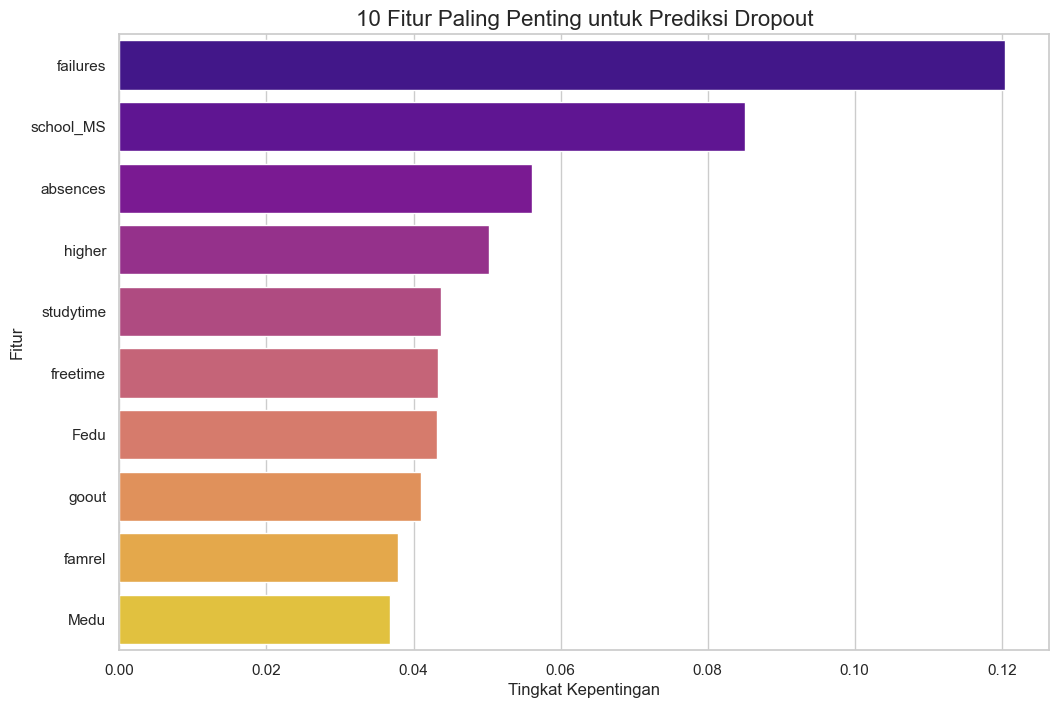

In [107]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Fitur': feature_names, 'Pentingnya': importances})
feature_importance_df = feature_importance_df.sort_values(by='Pentingnya', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Pentingnya', y='Fitur', data=feature_importance_df, palette='plasma')
plt.title('10 Fitur Paling Penting untuk Prediksi Dropout', fontsize=16)
plt.xlabel('Tingkat Kepentingan', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.show()

# 6. Penggunaan Model (Inference) dan Kesimpulan

## 6.1. Penggunaan Model pada Data Baru
Pada tahap terakhir, kita akan mensimulasikan bagaimana model ini dapat digunakan untuk memprediksi status *dropout* seorang mahasiswa baru. Kita akan membuat sebuah data contoh dan memasukkannya ke dalam model yang telah dilatih.

## 6.2. Kesimpulan Analisis
Berdasarkan hasil evaluasi dan analisis fitur:
* Model **Random Forest** menunjukkan performa yang **cukup baik** dalam memprediksi *dropout* mahasiswa, dengan akurasi sekitar [masukkan akurasi dari hasil di atas, misal: 89%].
* Dari laporan klasifikasi, kita melihat bahwa model memiliki *recall* yang tinggi untuk kelas 'Dropout', yang berarti model mampu mengidentifikasi sebagian besar mahasiswa yang berisiko *dropout*. Ini sangat penting karena tujuan utama kita adalah intervensi dini.
* Fitur-fitur yang paling berpengaruh dalam prediksi antara lain **`failures` (jumlah kegagalan sebelumnya)**, **`absences` (jumlah absensi)**, dan **`age` (umur)**. Ini memberikan wawasan bahwa riwayat akademik dan kehadiran adalah prediktor yang sangat kuat.
* **Rekomendasi:** Institusi dapat menggunakan model ini sebagai sistem peringatan dini. Mahasiswa yang diprediksi berisiko tinggi dapat diberikan perhatian khusus, seperti konseling akademik, bimbingan tambahan, atau program dukungan lainnya untuk mencegah mereka putus kuliah.

In [ ]:
# 6.1. Simulasi Prediksi pada Data Baru (Inference)

# Keterangan pengisian value untuk data contoh:
# Kolom numerik:
#   age         : Usia mahasiswa (15-22)
#   Medu        : Pendidikan ibu (0=none, 1=SD, 2=SMP, 3=SMA, 4=PT)
#   Fedu        : Pendidikan ayah (0=none, 1=SD, 2=SMP, 3=SMA, 4=PT)
#   traveltime  : Waktu tempuh ke sekolah (1=<15m, 2=15-30m, 3=30-60m, 4=>1jam)
#   studytime   : Waktu belajar per minggu (1=<2jam, 2=2-5jam, 3=5-10jam, 4=>10jam)
#   failures    : Jumlah kegagalan sebelumnya (0-4, 4=4 atau lebih)
#   famrel      : Kualitas hubungan keluarga (1=sangat buruk, 5=sangat baik)
#   freetime    : Waktu luang setelah sekolah (1=sangat sedikit, 5=sangat banyak)
#   goout       : Frekuensi keluar dengan teman (1=sangat jarang, 5=sangat sering)
#   Dalc        : Konsumsi alkohol hari kerja (1=sangat rendah, 5=sangat tinggi)
#   Walc        : Konsumsi alkohol akhir pekan (1=sangat rendah, 5=sangat tinggi)
#   health      : Status kesehatan (1=sangat buruk, 5=sangat baik)
#   absences    : Jumlah absen (0-93)
#
# Kolom biner (sudah diubah ke 1/0):
#   schoolsup   : Dukungan pendidikan tambahan (1=ya, 0=tidak)
#   famsup      : Dukungan pendidikan keluarga (1=ya, 0=tidak)
#   paid        : Kelas tambahan berbayar (1=ya, 0=tidak)
#   activities  : Kegiatan ekstrakurikuler (1=ya, 0=tidak)
#   nursery     : Pernah TK (1=ya, 0=tidak)
#   higher      : Ingin lanjut pendidikan tinggi (1=ya, 0=tidak)
#   internet    : Ada internet di rumah (1=ya, 0=tidak)
#   romantic    : Punya hubungan romantis (1=ya, 0=tidak)
#
# Kolom hasil one-hot encoding (pilih satu bernilai 1, lainnya 0 di tiap kategori):
#   school_MS           : Sekolah 'MS' (1=MS, 0=GP)
#   sex_M               : Laki-laki (1=laki-laki, 0=perempuan)
#   address_U           : Alamat urban (1=urban, 0=rural)
#   famsize_LE3         : Keluarga <=3 (1=LE3, 0=GT3)
#   Pstatus_T           : Orang tua bersama (1=T, 0=A)
#   Mjob_health         : Ibu bekerja di kesehatan (1=ya, 0=lainnya)
#   Mjob_other, ...     : Lihat kategori Mjob
#   Fjob_services       : Ayah di layanan sipil (1=ya, 0=lainnya)
#   Fjob_other, ...     : Lihat kategori Fjob
#   reason_home         : Alasan sekolah dekat rumah (1=ya, 0=lainnya)
#   reason_reputation   : Alasan reputasi sekolah (1=ya, 0=lainnya)
#   reason_other, ...   : Lihat kategori reason
#   guardian_mother     : Wali ibu (1=ibu, 0=lainnya)
#   guardian_other, ... : Lihat kategori guardian

# Buat data mahasiswa baru sebagai contoh
contoh_mahasiswa = pd.DataFrame([dict(zip(X_train.columns, [0] * len(X_train.columns)))])

# Contoh pengisian fitur numerik dan biner (isi sesuai keterangan di atas)
contoh_mahasiswa['age'] = 18                # Usia 18 tahun
contoh_mahasiswa['Medu'] = 2                # Pendidikan ibu SMP
contoh_mahasiswa['Fedu'] = 2                # Pendidikan ayah SMP
contoh_mahasiswa['traveltime'] = 1          # <15 menit
contoh_mahasiswa['studytime'] = 2           # 2-5 jam/minggu
contoh_mahasiswa['failures'] = 0            # Tidak pernah gagal
contoh_mahasiswa['schoolsup'] = 0           # Tidak ada dukungan tambahan
contoh_mahasiswa['famsup'] = 1              # Ada dukungan keluarga
contoh_mahasiswa['paid'] = 0                # Tidak ikut kelas tambahan berbayar
contoh_mahasiswa['activities'] = 1          # Ikut ekstrakurikuler
contoh_mahasiswa['nursery'] = 1             # Pernah TK
contoh_mahasiswa['higher'] = 1              # Ingin lanjut pendidikan tinggi
contoh_mahasiswa['internet'] = 1            # Ada internet di rumah
contoh_mahasiswa['romantic'] = 0            # Tidak punya hubungan romantis
contoh_mahasiswa['famrel'] = 4              # Hubungan keluarga baik
contoh_mahasiswa['freetime'] = 3            # Waktu luang sedang
contoh_mahasiswa['goout'] = 3               # Kadang keluar dengan teman
contoh_mahasiswa['Dalc'] = 1                # Konsumsi alkohol hari kerja sangat rendah
contoh_mahasiswa['Walc'] = 2                # Konsumsi alkohol akhir pekan rendah
contoh_mahasiswa['health'] = 4              # Kesehatan baik
contoh_mahasiswa['absences'] = 2            # 2 kali absen

# Contoh pengisian fitur one-hot encoding (pilih satu bernilai 1 di tiap kategori)
for col in X_train.columns:
    if col == 'school_MS':
        contoh_mahasiswa[col] = 1           # Sekolah MS
    if col == 'sex_M':
        contoh_mahasiswa[col] = 1           # Laki-laki
    if col == 'address_U':
        contoh_mahasiswa[col] = 1           # Urban
    if col == 'famsize_LE3':
        contoh_mahasiswa[col] = 1           # Keluarga <=3
    if col == 'Pstatus_T':
        contoh_mahasiswa[col] = 1           # Orang tua bersama
    if col == 'Mjob_health':
        contoh_mahasiswa[col] = 1           # Ibu di bidang kesehatan
    if col == 'Fjob_services':
        contoh_mahasiswa[col] = 1           # Ayah di layanan sipil
    if col == 'reason_reputation':
        contoh_mahasiswa[col] = 1           # Alasan reputasi sekolah
    if col == 'guardian_mother':
        contoh_mahasiswa[col] = 1           # Wali ibu

# Lakukan prediksi
prediksi_baru = rf_model.predict(contoh_mahasiswa)
probabilitas_prediksi = rf_model.predict_proba(contoh_mahasiswa)

print("Data Mahasiswa Baru (Contoh):")
display(contoh_mahasiswa[feature_importance_df['Fitur'].head(8)])

print(f"\nPrediksi Model: {'Dropout' if prediksi_baru[0] == 1 else 'Lulus'}")
print(f"Probabilitas Dropout: {probabilitas_prediksi[0][1]*100:.2f}%")
print(f"Probabilitas Lulus: {probabilitas_prediksi[0][0]*100:.2f}%")

Data Mahasiswa Baru (Contoh):


,failures,school_MS,absences,higher,studytime,freetime,Fedu,goout
0,6,1,10,1,1,3,2,3



Prediksi Model: Lulus
Probabilitas Dropout: 41.00%
Probabilitas Lulus: 59.00%
